<center><h1> Part II - Sentiment Analysis on Psoriasis Drug Reviews</h1></center>

### Problem Statement : 
<br>
1) What are the most popular Psoriasis drugs/companies based on data?
<br>

### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from collections import Counter
from textblob import TextBlob

import pycountry
import re
import string
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Reshma
[nltk_data]     Dua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Load extracted drugs csv

In [3]:
df_drug = pd.read_csv('./drug.csv')

In [4]:
df_drug.head()

,Drug_Name,Review
0,clobetasol,I have had moderate and sometimes severe plaqu...
1,clobetasol,I would use clobex on my thick plaque psoriasi...
2,clobetasol,CLOBEX IS AMAZING. It doesn't cure psoriasis ...
3,clobetasol,I used this medication as directed and it comp...
4,clobetasol,I have used Clobex for many years. It is the ...


In [5]:
print(df_drug.isnull().values.any())

False


In [6]:
df_drug.shape

(759, 2)

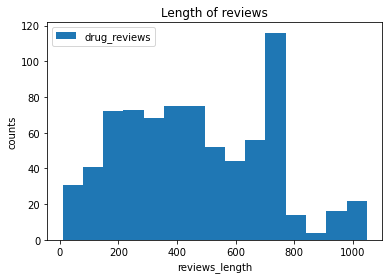

In [7]:
druglen = df_drug['Review'].str.len()

plt.hist(druglen,label ='drug_reviews',bins=15)

plt.title('Length of reviews')
plt.xlabel('reviews_length')
plt.ylabel('counts')
plt.legend()
plt.show()

In [8]:
# Get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
df_drug['word count'] = df_drug['Review'].apply(word_count)
df_drug.head()

,Drug_Name,Review,word count
0,clobetasol,I have had moderate and sometimes severe plaqu...,133
1,clobetasol,I would use clobex on my thick plaque psoriasi...,45
2,clobetasol,CLOBEX IS AMAZING. It doesn't cure psoriasis ...,102
3,clobetasol,I used this medication as directed and it comp...,73
4,clobetasol,I have used Clobex for many years. It is the ...,103


### 3. Getting most common words in training dataset

In [9]:
all_words = []
for line in list(df_drug['Review']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(10)    

[('i', 3091),
 ('and', 2128),
 ('the', 1902),
 ('my', 1754),
 ('to', 1424),
 ('a', 1204),
 ('it', 1118),
 ('for', 1059),
 ('have', 970),
 ('of', 886)]

In [10]:
# Calculating Negative, Positive, Neutral and Compound values
df_drug[['polarity', 'subjectivity']] = df_drug['Review'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df_drug['Review'].iteritems() :
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df_drug.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df_drug.loc[index, 'sentiment'] = "positive"
    else:
        df_drug.loc[index, 'sentiment'] = "neutral"
    df_drug.loc[index, 'neg'] = neg
    df_drug.loc[index, 'neu'] = neu
    df_drug.loc[index, 'pos'] = pos
    df_drug.loc[index, 'compound'] = comp
df_drug.head()

,Drug_Name,Review,word count,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,clobetasol,I have had moderate and sometimes severe plaqu...,133,-0.012436,0.578846,negative,0.115,0.812,0.073,-0.6829
1,clobetasol,I would use clobex on my thick plaque psoriasi...,45,0.266667,0.391667,positive,0.044,0.839,0.117,0.5423
2,clobetasol,CLOBEX IS AMAZING. It doesn't cure psoriasis ...,102,0.058333,0.446528,positive,0.043,0.796,0.160,0.8943
3,clobetasol,I used this medication as directed and it comp...,73,0.322500,0.507500,negative,0.169,0.735,0.096,-0.7108
4,clobetasol,I have used Clobex for many years. It is the ...,103,0.150000,0.653704,positive,0.000,0.923,0.077,0.7615


In [11]:
df_drug.to_csv('drug_sen_analysis.csv')

In [12]:
# Creating new data frames for all sentiments (positive, negative and neutral)
review_negative = df_drug[df_drug["sentiment"]=="negative"]
review_positive = df_drug[df_drug["sentiment"]=="positive"]
review_neutral = df_drug[df_drug["sentiment"]=="neutral"]

In [13]:
# Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df_drug,'sentiment')

,Total,Percentage
positive,451,59.42
negative,294,38.74
neutral,14,1.84


In [18]:
# Create data for Pie Chart
def pie_chart(data,title):
    pichart = count_values_in_column(data,'sentiment')
    names= pichart.index
    size=pichart['Percentage']

    # Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(size, labels=names, colors=['green','blue','red'])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.style.use('default')   ### annotate values

    plt.suptitle('Sentiment Analysis Result' )
    plt.title(title )
    plt.axis('equal')
    plt.show()
    plt.show()

In [19]:
Drug_Name = df_drug['Drug_Name'].unique()

In [20]:
len(Drug_Name)

15

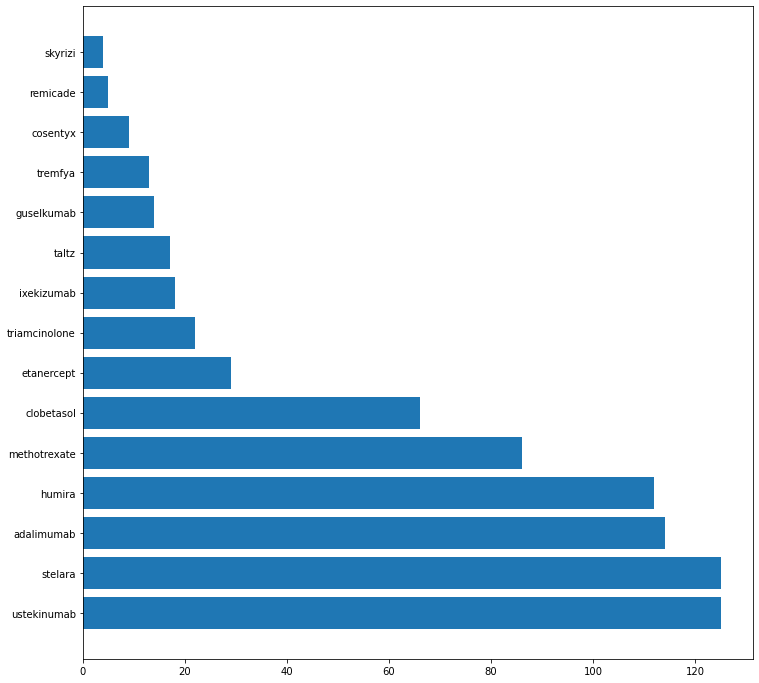

In [14]:
drug_compososition = df_drug['Drug_Name'].value_counts()
plt.figure(figsize=(12,12))
fig = plt.barh(drug_compososition.index, width=drug_compososition.values, align='center')

#### Insight:
- The graph shows the composition of various drug reviews,for the entire dataset.
- **Stelara** and **Ustekinumab** have the highest number of reviews.
- **Remicade** and **Skyrizi** have lowest number of reviews.

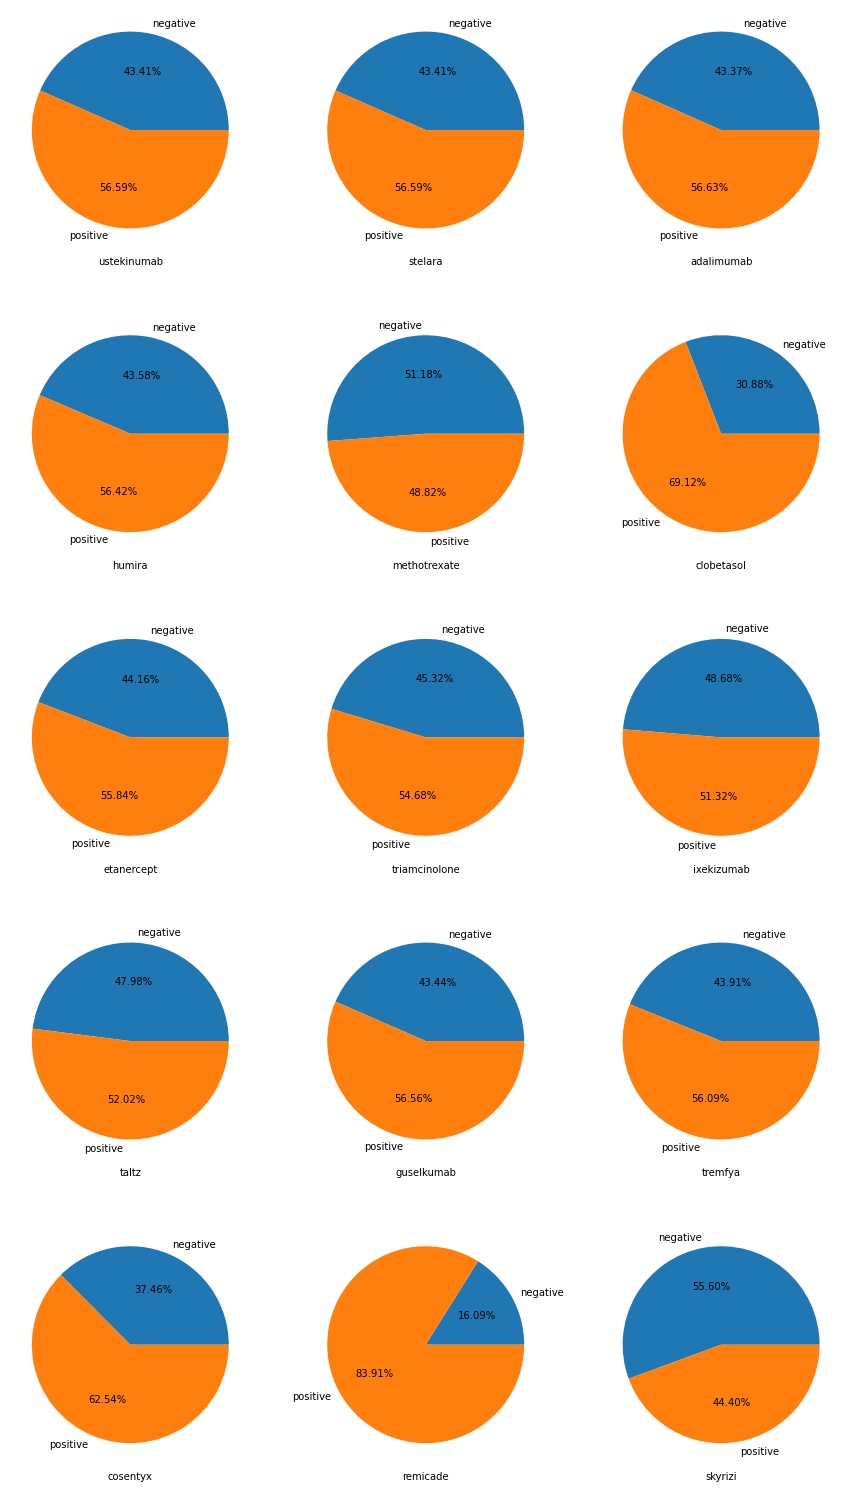

In [17]:
plt.figure(figsize=(15,27))

for i in range(len(drug_compososition.index)):
    temp_df = df_drug[df_drug['Drug_Name'] == drug_compososition.index[i]]
    dict_ ={'negative':0,'positive':0}
    dict_['negative'] = sum(temp_df['neg'])
    dict_['positive'] = sum(temp_df['pos'])
    
    total = sum(dict_.values())
    dict_['negative'] = (dict_['negative']/total)*100
    dict_['positive'] = (dict_['positive']/total)*100
    
    plt.subplot(5, 3, i+1)
    plt.pie(x = dict_.values(), labels=dict_.keys(), autopct='%.2f%%')
    plt.xlabel(drug_compososition.index[i])

**Insights:**

- Clobetasol, Cosentyx, Remicade: These are the drugs which have a higher positive sentiment attached to them compared to the other drugs, with Remicade having the highest positive sentimental reviews (83.91%). Making Johnson and Johnson Inc. the most trusted drug manufacturing company for Psoriasis.


- All the other drugs have more or less an equal proportion for both positive and negative sentiments, with positive sentiments having a bigger portion.


- Skyrizi is the only drug that has a higher negative sentiment attached to it compared to the rest of the drugs.

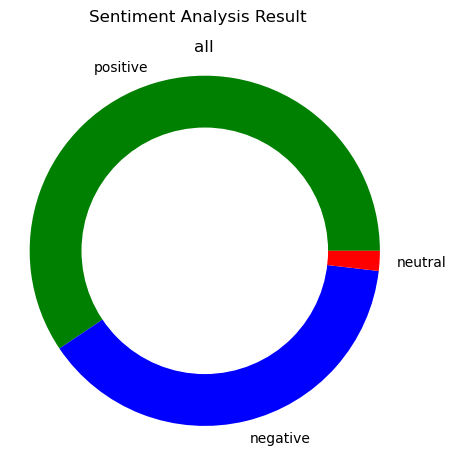

In [23]:
plt.figure(figsize=(5,5))
pie_chart(df_drug,"all")

### 4. Word Cloud Analysis

In [24]:
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

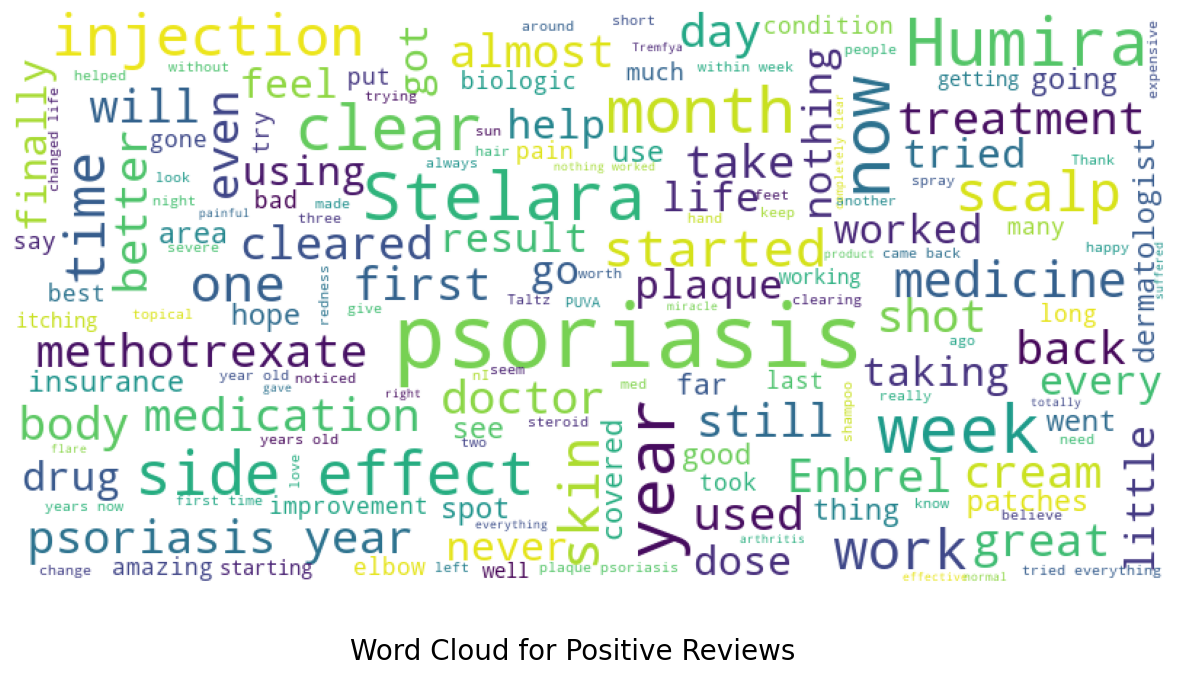

In [25]:
# Creating wordcloud for positive sentiment
wordcloud(review_positive['Review'].values, "Word Cloud for Positive Reviews")

#### Insights: 
It's obvious that Psoriasis has the largest word count as it was the keyword that was looked for to retrieve the tweets. This is common for both the sentiments.
<br>

- **year, month, week, start:** these keywords indicate the timeframe within which the patients have been using the drugs and have a positive outlook towards the drug.
- **clear, work:** these are positive words used to depict the effectiveness of the drug (e.g. My skin is clear now, The drug works).
- **stelara, humira, inject:** these are various injecting devices that are used in association with the drug.

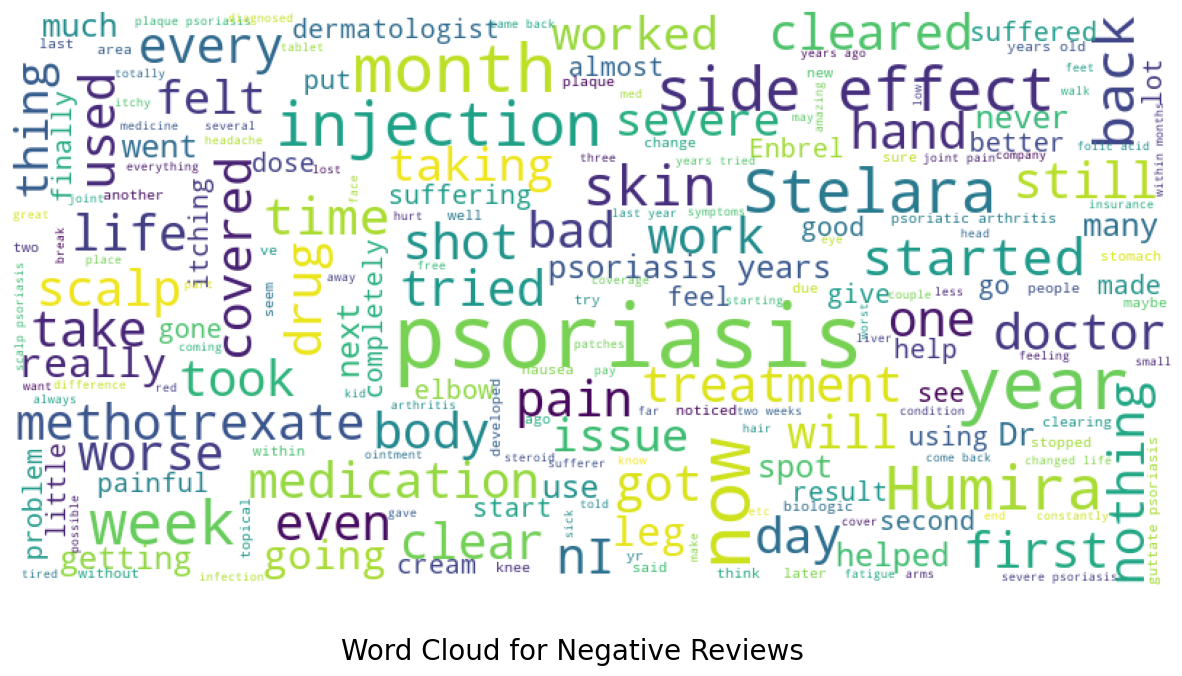

In [26]:
# Creating wordcloud for negative sentiment
wordcloud(review_negative['Review'].values, "Word Cloud for Negative Reviews")

#### Insights: 

- **year, month, week, start:** these keywords indicate the timeframe within which the patients have been using the drugs and have a negative outlook towards the drug.
- **clear, work:** these are words depicting the non-effectiveness of the drug (e.g. My skin is not clear, The drug doesn't work at all).
- **pain, effect:** these words highlights the discomfort level of the patients with respect to Psoriasis. (e.g. I'm still under a lot of pain, the drug has no effect)

In [22]:
# Tokenisation

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
df_drug['punct'] = df_drug['Review'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df_drug['tokenized'] = df_drug['punct'].apply(lambda x: tokenization(x.lower()))

In [23]:
# Removing stopwords
stopword = nltk.corpus.stopwords.words('english')

In [24]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_drug['nonstop'] = df_drug['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df_drug['stemmed'] = df_drug['nonstop'].apply(lambda x: stemming(x))

In [25]:
# Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [26]:
# Appliyng Countvectorizer positive 
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(review_positive['Review'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df_positive = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df_positive.head()

451 Number of reviews has 1875 words


,,abbvi,abil,abl,abnorm,absolut,absolutey,absorb,accept,accord,...,yellowish,yesterday,yet,youll,young,younger,youth,yr,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Most Used Words in positive tweets
count = pd.DataFrame(count_vect_df_positive.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
year,394
clear,275
month,241
work,226
week,224
stelara,196
humira,192
inject,191
tri,184
start,178


In [28]:
# Applying Countvectorizer negative 
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(review_negative['Review'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df_negative = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df_negative.head()

294 Number of reviews has 1734 words


,,abdomen,abdomin,abl,ablaz,absolut,ach,achiev,acid,acn,...,yellow,yet,young,younger,your,youv,yr,yup,zero,zoster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Most Used Words for negative tweets 
count = pd.DataFrame(count_vect_df_negative.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
year,244
month,162
clear,147
week,140
inject,134
start,125
work,125
pain,122
humira,118
effect,116
